# Analysis of US Presidential Election Data

This report presents analysis of US presidential election data for 2012 and 2016. 
The analysis is based on two spreadsheet datasets named *vote* and *data*. Both datasets are organized in a county-based manner meaning that every row includes information related to a specific county in US. The vote dataset includes number of votes for each of democrate and republican parties at each county in 2012 and 2016 elections. The data dataset includes census stats for each county including racial breakdown and economic status.

# Data cleaning

In this section *data* and *vote* datasets are inspected and cleaned. Data cleaning process for these datasets involved removing duplicate columns and handling missing values.

## *Data* dataset

To prepare for data cleaning, overall data parameters is inspected. The shape of the *data* dataset is evaluated as:

In [1]:
import numpy as np
import pandas as pd
df_data = pd.read_csv('data.csv')
df_data.shape 

(3141, 54)

This dataset includes 3141 rows corresponding to the number of counties in US and 54 columns of census information about these counties. A view of top 5 rows of this dataset are generated as follows:

In [2]:
pd.options.display.max_columns = 100
df_data.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.5,21988.947300,67.90,27.95,0.15,0.55,0.85,2.65,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.10,47.7,0.429,0.181,0.323,0.126,747.3,79.9,0.197,0.108,449.02,NaN,82.0,NaN
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.4,23365.948890,92.00,0.25,1.25,0.30,1.50,4.70,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.07,49.0,0.179,0.304,0.328,0.135,247.2,131.3,0.239,0.053,245.83,NaN,96.8,NaN
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.2,25363.060950,72.70,22.20,0.40,0.10,1.05,3.55,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.09,54.1,0.381,0.210,0.298,0.118,324.1,402.4,0.239,0.096,205.60,NaN,71.6,NaN
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.1,35484.543175,68.40,0.30,0.25,1.15,1.10,28.90,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.09,41.3,0.204,0.095,0.132,0.036,190.9,133.7,0.230,0.081,123.88,NaN,42.9,3.5
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.5,26927.608255,66.15,29.80,0.15,0.45,0.65,2.80,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.12,64.0,0.453,0.189,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.11,79.4,NaN


At the first glance, it can be seen that the table involves many duplications in its columns. Following table shows 
names of duplicate columns:


|State|White|Black|Asian|Hispanic|
|-|-|-|-|-|
|ST|White <br> (Not Latino) <br> Population|African <br> American <br> Population|Asian <br> American <br> Population|Latino <br> Population|

To evaluate the potential of each column for removal, number of unique items in 
each of these columns are evaluated to ensure that the column with most complete
information is retained.

In [3]:
df_data[['State','ST', 'Fips','County', 'Precincts']].nunique()

State          51
ST             51
Fips         3141
County       3141
Precincts     303
dtype: int64

Number of unique items in *State* and *ST* are both equal to number states in US. Therefore, there is no difference between the two columns in terms of completeness of information; however, *State* column has more information on state names, so it is kept and *ST* is removed.
Number of unique counties, FIPS codes, and precincts are retrieved as well to valuidate the accuracy of information in these columns.

For numerical columns, statistical information for duplicate columns are calculated as:

In [4]:
df_data.describe()[['White (Not Latino) Population', 'White', 'African American Population', 'Black', 'Asian American Population', 'Asian', 'Latino Population', 'Hispanic']]

,White (Not Latino) Population,White,African American Population,Black,Asian American Population,Asian,Latino Population,Hispanic
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,78.778908,78.778908,8.752642,8.752642,1.106129,1.106129,7.904760,7.904760
std,19.625220,19.625220,14.384847,14.384847,2.435244,2.435244,12.955106,12.955106
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.700000,67.700000,0.400000,0.400000,0.250000,0.250000,1.450000,1.450000
50%,86.350000,86.350000,1.900000,1.900000,0.450000,0.450000,2.950000,2.950000
75%,94.300000,94.300000,9.900000,9.900000,1.000000,1.000000,7.800000,7.800000
max,99.200000,99.200000,86.100000,86.100000,42.700000,42.700000,97.150000,97.150000


For all four groups, all eight of their statistical information matches perfectly meaning either one can be removed from the dataset
as follows:

In [5]:
df_data.drop(['ST', 'White (Not Latino) Population', 'African American Population', 'Asian American Population', 'Latino Population'], axis = 1, inplace = True)

To clean null values in this table, percentage of null values in each column is evaluated as:

In [6]:
np.mean(df_data.isna(),axis=0)*100

State                                                          0.000000
Fips                                                           0.000000
County                                                         0.000000
Precincts                                                      1.018784
Votes                                                          1.018784
Less Than High School Diploma                                  0.000000
At Least High School Diploma                                   0.000000
At Least Bachelors's Degree                                    0.000000
Graduate Degree                                                0.000000
School Enrollment                                              0.000000
Median Earnings 2010                                           0.000000
Native American Population                                     0.000000
Other Race or Races                                            0.000000
Children Under 6 Living in Poverty                             0

*HIV.prevalence.rate* and *Homicide.rate* have more than 50% null values and *Infant.mortality* has more than 25%. Furthermore, 
information in these topics might not have significant influence on election results. Therefore, these three columns are dropped out 
of the dataset as follows:

In [7]:
df_data.drop(['HIV.prevalence.rate','Homicide.rate','Infant.mortality'], axis = 1, inplace = True)

As rest of the null values are in numerical columns, mean value of each column is assigned for missing data in that column.

In [8]:
df_data.fillna(df_data.mean(), inplace=True)

To confirm that there are no longer any null values in the table, table information is retrieved as follows:

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 46 columns):
State                                                         3141 non-null object
Fips                                                          3141 non-null int64
County                                                        3141 non-null object
Precincts                                                     3141 non-null float64
Votes                                                         3141 non-null float64
Less Than High School Diploma                                 3141 non-null float64
At Least High School Diploma                                  3141 non-null float64
At Least Bachelors's Degree                                   3141 non-null float64
Graduate Degree                                               3141 non-null float64
School Enrollment                                             3141 non-null float64
Median Earnings 2010                                     

## *Vote* dataset

The shape of the *vote* dataset is evaluated as:

In [11]:
df_vote = pd.read_csv('votes.csv')
df_vote.shape

(3141, 6)

It is validated that this dataset includes information for all counties. Furthermore, it consists of 6 clomuns related to elections.
To obtained an insight about each column, head of the table is shown as follows:

In [12]:
df_vote = pd.read_csv('votes.csv')
df_vote.head()

,Unnamed: 0,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
0,0,2630.0,3887.0,2364.0,3967.0,5043
1,1,2099.0,4263.0,1587.0,4917.0,5087
2,2,1845.0,4136.0,1544.0,4353.0,13159
3,3,12792.0,9411.0,12652.0,8153.0,8037
4,4,2442.0,5214.0,1836.0,5021.0,13091


Columns contain information about break down of democrat and republican votes in 2012 and 2016 as well as the FIPS code of each county.
There is a duplicated index column named *Unnamed: 0* which is dropped out of the table as follows:

In [13]:
df_vote.drop(['Unnamed: 0'], axis = 1, inplace = True)
display(df_vote)

,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
0,2630.0,3887.0,2364.0,3967.0,5043
1,2099.0,4263.0,1587.0,4917.0,5087
2,1845.0,4136.0,1544.0,4353.0,13159
3,12792.0,9411.0,12652.0,8153.0,8037
4,2442.0,5214.0,1836.0,5021.0,13091
...,...,...,...,...,...
3136,62388.0,105176.0,56700.0,104441.0,39017
3137,7062.0,13633.0,4537.0,15586.0,39091
3138,81464.0,59405.0,64958.0,65346.0,39093
3139,6144.0,8162.0,5455.0,9992.0,40021


To obtain an insight about the number of null values in the table, percentage of null values in each column is obtained as:

In [14]:
np.mean(df_vote.isna(),axis=0)*100

Democrats_12(Votes)      0.986947
Republicans_12(Votes)    0.986947
Democrats_16(Votes)      1.018784
Republicans_16(Votes)    1.018784
Fips                     0.000000
dtype: float64

The results show that only a small percentage of data is missing. Therefor, they are replaced by mean value of each column as follows: 

In [15]:
df_vote.fillna(df_vote.mean(), inplace=True)

To confirm that there are no longer any null values in the table, table information is retrieved as follows:

In [16]:
df_vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 5 columns):
Democrats_12(Votes)      3141 non-null float64
Republicans_12(Votes)    3141 non-null float64
Democrats_16(Votes)      3141 non-null float64
Republicans_16(Votes)    3141 non-null float64
Fips                     3141 non-null int64
dtypes: float64(4), int64(1)
memory usage: 122.8 KB


Four additional column is added to the end of this table calculating percentages of democrat and republican voters in 2012 and 2016
as follows:

In [17]:
df_vote['Percent_Democrats_12'] = df_vote['Democrats_12(Votes)']/(df_vote['Democrats_12(Votes)']+df_vote['Republicans_12(Votes)'])*100
df_vote['Percent_Republicans_12'] = df_vote['Republicans_12(Votes)']/(df_vote['Democrats_12(Votes)']+df_vote['Republicans_12(Votes)'])*100
df_vote['Percent_Democrats_16'] = df_vote['Democrats_16(Votes)']/(df_vote['Democrats_16(Votes)']+df_vote['Republicans_16(Votes)'])*100
df_vote['Percent_Republicans_16'] = df_vote['Republicans_16(Votes)']/(df_vote['Democrats_16(Votes)']+df_vote['Republicans_16(Votes)'])*100
df_vote

,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips,Percent_Democrats_12,Percent_Republicans_12,Percent_Democrats_16,Percent_Republicans_16
0,2630.0,3887.0,2364.0,3967.0,5043,40.355992,59.644008,37.340073,62.659927
1,2099.0,4263.0,1587.0,4917.0,5087,32.992770,67.007230,24.400369,75.599631
2,1845.0,4136.0,1544.0,4353.0,13159,30.847684,69.152316,26.182805,73.817195
3,12792.0,9411.0,12652.0,8153.0,8037,57.613836,42.386164,60.812305,39.187695
4,2442.0,5214.0,1836.0,5021.0,13091,31.896552,68.103448,26.775558,73.224442
...,...,...,...,...,...,...,...,...,...
3136,62388.0,105176.0,56700.0,104441.0,39017,37.232341,62.767659,35.186576,64.813424
3137,7062.0,13633.0,4537.0,15586.0,39091,34.124185,65.875815,22.546340,77.453660
3138,81464.0,59405.0,64958.0,65346.0,39093,57.829615,42.170385,49.851117,50.148883
3139,6144.0,8162.0,5455.0,9992.0,40021,42.947015,57.052985,35.314301,64.685699


# Exploratory data analytics (EDA)

To obtain an insight about the data in these tables, five plots are created as follows:

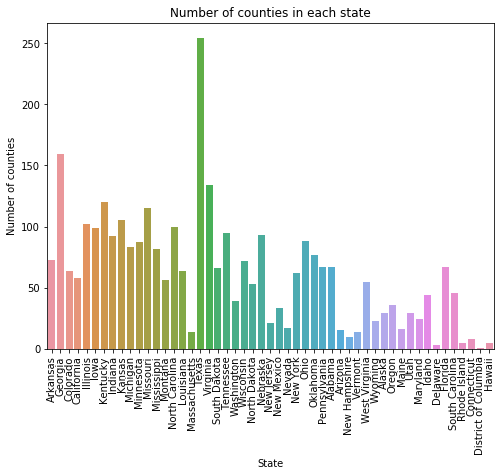

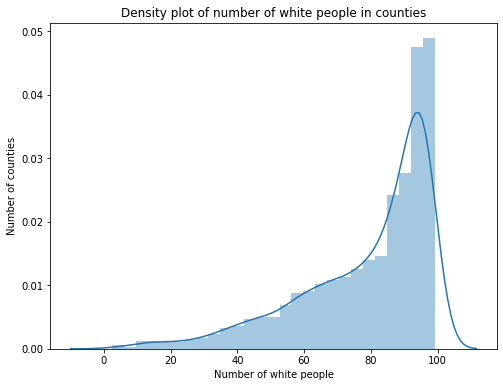

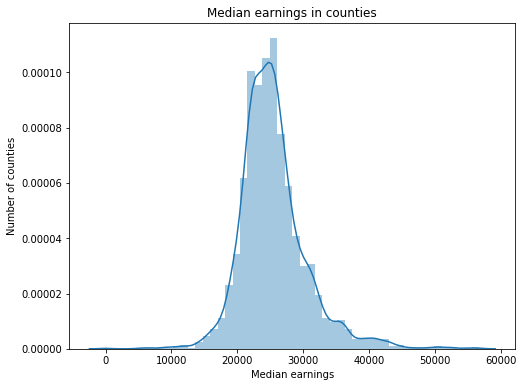

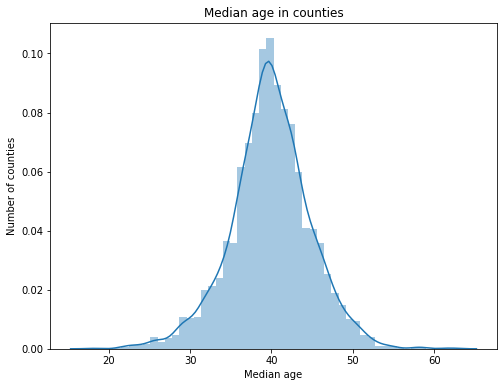

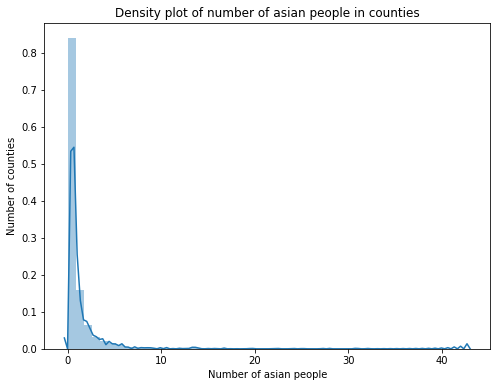

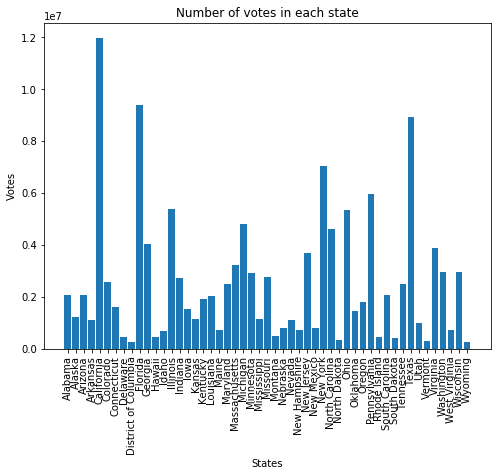

KeyError: 'State'

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8.0, 6.0)
import matplotlib.gridspec as gridspec
import seaborn as sns

shape = (3,2)

sns.countplot(df_data['State'])
plt.title('Number of counties in each state')
plt.xlabel('State')
plt.ylabel('Number of counties')
plt.xticks(rotation = 90)
plt.show()

"""
sns.distplot(df_data['Votes'])
plt.title('Density plot of number of votes in counties')
plt.xlabel('Number of votes')
plt.ylabel('Number of counties')
plt.show()
"""

sns.distplot(df_data['White'])
plt.title('Density plot of number of white people in counties')
plt.xlabel('Number of white people')
plt.ylabel('Number of counties')
plt.show()


sns.distplot(df_data['Median Earnings 2010'])
plt.title('Median earnings in counties')
plt.xlabel('Median earnings')
plt.ylabel('Number of counties')
plt.show()

sns.distplot(df_data['median_age'])
plt.title('Median age in counties')
plt.xlabel('Median age')
plt.ylabel('Number of counties')
plt.show()




sns.distplot(df_data['Asian'])
plt.title('Density plot of number of asian people in counties')
plt.xlabel('Number of asian people')
plt.ylabel('Number of counties')
plt.show()

plt.bar(df_data.groupby('State').sum().index, df_data.groupby('State').sum()['Votes'])
plt.title('Number of votes in each state')
plt.xlabel('States')
plt.ylabel('Votes')
plt.xticks(rotation = 90)
plt.show()


plt.bar(df_data.groupby('State').sum().index, df_vote.groupby('State').sum()['Votes'])
plt.title('Number of votes in each state')
plt.xlabel('States')
plt.ylabel('Votes')
plt.xticks(rotation = 90)
plt.show()

In [30]:
df_merge=pd.merge(df_data,df_vote,on='Fips')
display(df_merge)

,State,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,Native American Population,Other Race or Races,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White_Asian,SIRE_homogeneity,median_age,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Percent_Democrats_12,Percent_Republicans_12,Percent_Democrats_16,Percent_Republicans_16
0,Arkansas,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,78.50,21988.947300,0.15,0.85,34.15,14.40,18604,73.5,23.45,0.469,36.95,28.35,18.25,20.15,3.60,9.40,20.20,67.90,27.95,2.65,0.55,0.15,0.85,68.45,0.539968,36.8,0.100000,47.7,0.429,0.181000,0.323,0.126,747.300000,0.197,0.108,449.02,82.000000,2630.0,3887.0,2364.0,3967.0,40.355992,59.644008,37.340073,62.659927
1,Arkansas,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,76.40,23365.948890,1.25,1.50,26.20,18.45,15597,43.8,18.20,0.446,25.15,25.15,16.85,19.55,2.90,16.20,19.40,92.00,0.25,4.70,0.30,1.25,1.50,92.30,0.849006,38.5,0.070000,49.0,0.179,0.304000,0.328,0.135,247.200000,0.239,0.053,245.83,96.800000,2099.0,4263.0,1587.0,4917.0,32.992770,67.007230,24.400369,75.599631
2,Georgia,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,70.20,25363.060950,0.40,1.05,17.60,17.95,13744,36.5,18.05,0.451,27.60,21.60,17.15,22.60,4.35,15.10,19.25,72.70,22.20,3.55,0.10,0.40,1.05,72.80,0.579201,38.1,0.090000,54.1,0.381,0.210000,0.298,0.118,324.100000,0.239,0.096,205.60,71.600000,1845.0,4136.0,1544.0,4353.0,30.847684,69.152316,26.182805,73.817195
3,Colorado,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,64.10,35484.543175,0.25,1.10,11.65,4.85,51405,50.7,9.40,0.464,12.05,32.90,24.80,20.05,0.45,15.50,6.30,68.40,0.30,28.90,1.15,0.25,1.10,69.55,0.551646,33.4,0.090000,41.3,0.204,0.095000,0.132,0.036,190.900000,0.230,0.081,123.88,42.900000,12792.0,9411.0,12652.0,8153.0,57.613836,42.386164,60.812305,39.187695
4,Georgia,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,61.50,26927.608255,0.15,0.65,20.65,20.60,20745,41.5,21.15,0.464,23.70,26.15,20.05,22.00,1.60,11.35,18.85,66.15,29.80,2.80,0.45,0.15,0.65,66.60,0.527235,37.7,0.120000,64.0,0.453,0.189000,0.358,0.153,497.900000,0.208,0.115,477.48,79.400000,2442.0,5214.0,1836.0,5021.0,31.896552,68.103448,26.775558,73.224442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Ohio,39017,"Butler County, Ohio",282.0,168422.0,13.2,86.8,25.9,9.5,79.95,29687.650475,0.20,1.80,19.15,6.80,362504,49.8,12.75,0.427,16.05,33.85,16.40,26.60,0.15,8.45,14.60,85.65,6.85,3.35,2.20,0.20,1.80,87.85,0.740219,35.7,0.080000,35.8,0.303,0.227000,0.298,0.104,302.200000,0.129,0.071,339.05,55.000000,62388.0,105176.0,56700.0,104441.0,37.232341,62.767659,35.186576,64.813424
3137,Ohio,39091,"Logan County, Ohio",38.0,21007.0,14.1,85.9,14.3,5.2,73.40,27308.285080,0.20,2.00,28.25,7.50,46144,31.7,14.00,0.413,23.55,26.05,15.10,21.85,0.60,8.95,27.45,94.70,1.45,1.05,0.60,0.20,2.00,95.30,0.897570,38.9,0.080000,44.0,0.353,0.218000,0.297,0.127,238.600000,0.136,0.067,133.96,72.600000,7062.0,13633.0,4537.0,15586.0

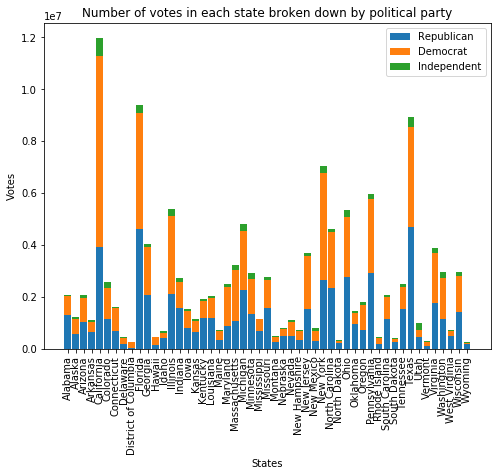

In [51]:
p1 = plt.bar(df_merge.groupby('State').sum().index, df_merge.groupby('State').sum()['Republicans_16(Votes)'])
p2 = plt.bar(df_merge.groupby('State').sum().index, df_merge.groupby('State').sum()['Democrats_16(Votes)'], bottom=df_merge.groupby('State').sum()['Republicans_16(Votes)'])
p3=plt.bar(df_merge.groupby('State').sum().index, df_merge.groupby('State').sum()['Votes']-(df_merge.groupby('State').sum()['Republicans_16(Votes)']+df_merge.groupby('State').sum()['Democrats_16(Votes)']), bottom=df_merge.groupby('State').sum()['Republicans_16(Votes)']+df_merge.groupby('State').sum()['Democrats_16(Votes)'])
plt.title('Number of votes in each state broken down by political parties')
plt.xlabel('States')
plt.ylabel('Votes')
plt.xticks(rotation = 90)
plt.legend((p1[0], p2[0], p3[0]), ('Republican', 'Democrat', 'Independent'))
plt.show()

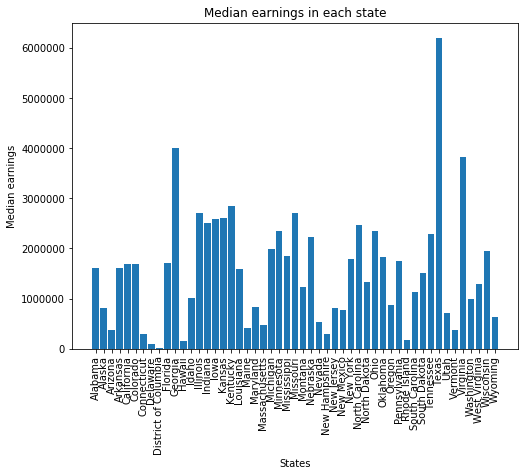

In [54]:
plt.bar(df_merge.groupby('State').sum().index, df_merge.groupby('State').sum()['Median Earnings 2010'])
plt.title('Median earnings in each state')
plt.xlabel('States')
plt.ylabel('Median earnings')
plt.xticks(rotation = 90)
plt.show()

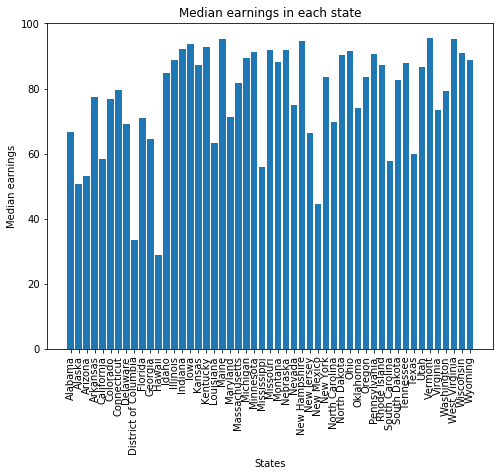

In [59]:
plt.bar(df_merge.groupby('State').sum().index, df_merge.groupby('State').mean()['White'])
plt.title('Percent white population in each state')
plt.xlabel('States')
plt.ylabel('White population')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
p1 = plt.bar(df_merge.groupby('State').sum().index, df_merge.groupby('State').sum()['Republicans_16(Votes)'])
p2 = plt.bar(df_merge.groupby('State').sum().index, df_merge.groupby('State').sum()['Democrats_16(Votes)'], bottom=df_merge.groupby('State').sum()['Republicans_16(Votes)'])
p3=plt.bar(df_merge.groupby('State').sum().index, df_merge.groupby('State').sum()['Votes']-(df_merge.groupby('State').sum()['Republicans_16(Votes)']+df_merge.groupby('State').sum()['Democrats_16(Votes)']), bottom=df_merge.groupby('State').sum()['Republicans_16(Votes)']+df_merge.groupby('State').sum()['Democrats_16(Votes)'])
plt.title('Number of votes in each state broken down by political parties')
plt.xlabel('States')
plt.ylabel('Votes')
plt.xticks(rotation = 90)
plt.legend((p1[0], p2[0], p3[0]), ('Republican', 'Democrat', 'Independent'))
plt.show()